In [1]:
import matplotlib.pyplot as plt
import numpy as np

import DissimilarityMetrics
import ChannelChartingCore
import Evaluation

2024-10-16 16:55:19.983620: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-16 16:55:20.796240: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import dichasus_cf0x

2024-10-16 16:55:22.328784: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-16 16:55:22.383571: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-16 16:55:22.383957: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### Load datapoints from file
This may take some time.

In [3]:
groundtruth_positions = []
csi_time_domain = []
timestamps = []

for csi, pos, time in dichasus_cf0x.trainingset.batch(1000):
    csi_time_domain.append(csi.numpy())
    groundtruth_positions.append(pos.numpy())
    timestamps.append(time.numpy())

csi_time_domain = np.concatenate(csi_time_domain)
groundtruth_positions = np.concatenate(groundtruth_positions)
timestamps = np.concatenate(timestamps)

MEASUREMENT_INTERVAL = 0.048
timestamps = timestamps - timestamps[0]
timestamps = np.round(timestamps / MEASUREMENT_INTERVAL) * MEASUREMENT_INTERVAL

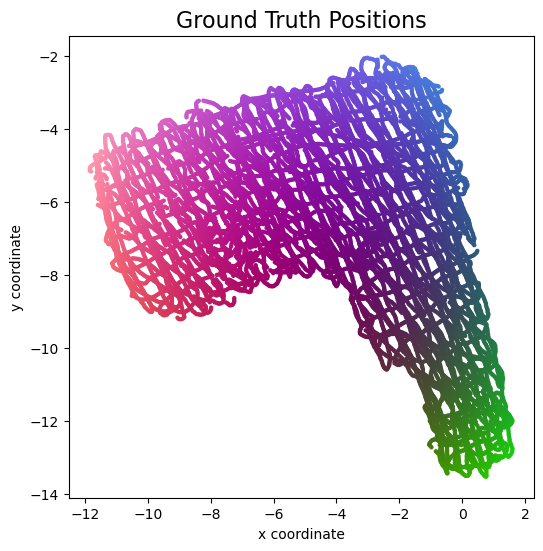

In [4]:
Evaluation.plot_colorized(groundtruth_positions, groundtruth_positions, title="Ground Truth Positions")

### Angle Delay Profile Dissimilarity

In [5]:
def mean_variance_from_delta_adp(delta_adp):
    mean = np.where(delta_adp == 0, 0, np.where(delta_adp > 18, np.inf, delta_adp * 0.0028 + 0.0024))
    variance = np.where(delta_adp == 0, 0, np.where(delta_adp > 18, np.inf, 0.015 * mean))

    return mean, variance

adp_metric = DissimilarityMetrics.ADPDissimilarityMetric(csi_time_domain, mean_variance_from_delta_adp)

### Timestamp/Velocity-Based Dissimilarity

In [6]:
velocity_mean = 0.235
velocity_variance = 0.010

# Make worste-case assumption of perfectly correlated velocities. This maximizes the variance.
velocity_metric = DissimilarityMetrics.VelocityDissimilarityMetric(velocity_mean, velocity_variance, True, timestamps)

### Gaussian Dissimilarity Model and short path computation

This will also take some time

In [7]:
GDM = ChannelChartingCore.GaussianDissimilarityModel([adp_metric, velocity_metric])
GDM.generate_short_paths(total_path_count = 40000, realization_count = 8)

  0%|          | 0/8 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Contracting paths for metric VelocityDissimilarityMetric
58624071 path sections remain to be contracted
23665900 path sections remain to be contracted
6453738 path sections remain to be contracted
243135 path sections remain to be contracted
855 path sections remain to be contracted
0 path sections remain to be contracted
Determining longest short path...


Computing longest paths:   0%|          | 0/40000 [00:00<?, ?it/s]

Preparing tasks:   0%|          | 0/40000 [00:00<?, ?it/s]

Starting processes:   0%|          | 0/32 [00:00<?, ?it/s]

Longest short path has 377 hops


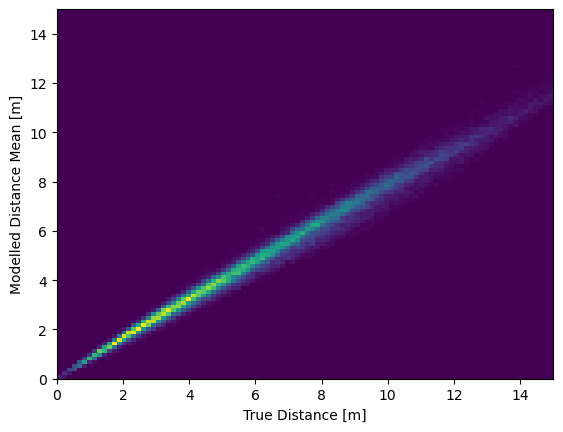

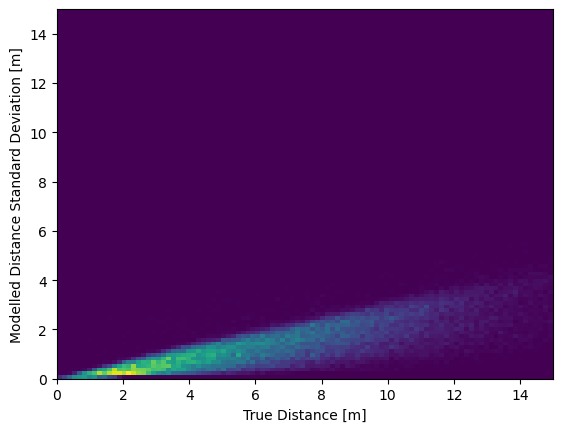

In [8]:
paths, path_hops, paths_d_mean, paths_d_variance = GDM.get_random_short_paths(50000, None)
groundtruth_distance_matrix = np.sqrt(np.sum((groundtruth_positions[:,np.newaxis,:] - groundtruth_positions[np.newaxis,:,:])**2, axis = -1))
groundtruth_dist = np.sum(groundtruth_distance_matrix[paths[:,:-1], paths[:,1:]], axis = 1).flatten()

plt.xlabel("True Distance [m]")
plt.ylabel("Modelled Distance Mean [m]")
plt.hist2d(groundtruth_dist, paths_d_mean, bins = 100, range = [(0, 15), (0, 15)])
plt.show()

plt.xlabel("True Distance [m]")
plt.ylabel("Modelled Distance Standard Deviation [m]")
plt.hist2d(groundtruth_dist, np.sqrt(paths_d_variance), bins = 100, range = [(0, 15), (0, 15)])
plt.show()

### Channel Chart Training

Feel free to tweak the hyperparameters!

In [9]:
MIN_BATCH_SIZE = 500
MAX_BATCH_SIZE = 4000
LEARNING_RATE_INITIAL = 1.5e-2
LEARNING_RATE_FINAL = 1e-2
MAX_HOPLENGTH = 20.0
MIN_HOPLENGTH = 0.1
TRAINING_BATCHES = 3000
ACCELERATION_MEAN = 0
ACCELERATION_VARIANCE = 1
ACCELERATION_WEIGHT = 1e-4

Pre-computing training paths:   0%|          | 0/3005 [00:00<?, ?it/s]

Preparing multiprocessing inputs:   0%|          | 0/3005 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/32 [00:00<?, ?it/s]

2024-10-16 17:04:03.781711: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-16 17:04:03.856649: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f585b8d6ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-16 17:04:03.856700: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2024-10-16 17:04:03.864278: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-16 17:04:03.889854: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-10-16 17:04:04.000920: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

 199/3000 [>.............................] - ETA: 2:19 - loss: 4.4461 - metric: 0.0000e+00

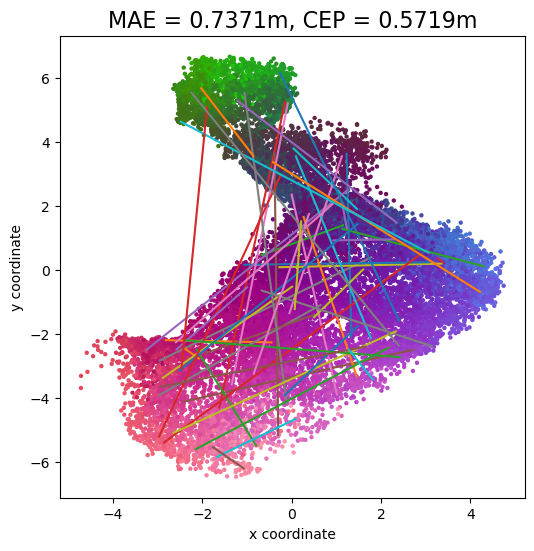

 399/3000 [==>...........................] - ETA: 2:11 - loss: 2.7322 - metric: 0.0000e+00

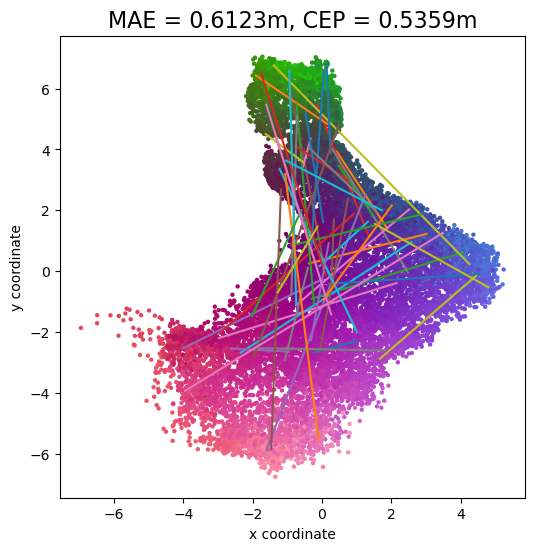

 599/3000 [====>.........................] - ETA: 2:02 - loss: 2.0039 - metric: 0.0000e+00

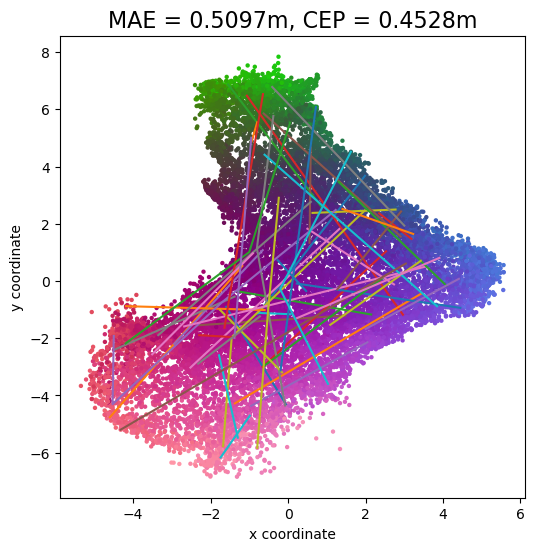

 799/3000 [======>.......................] - ETA: 1:52 - loss: 1.6625 - metric: 0.0000e+00

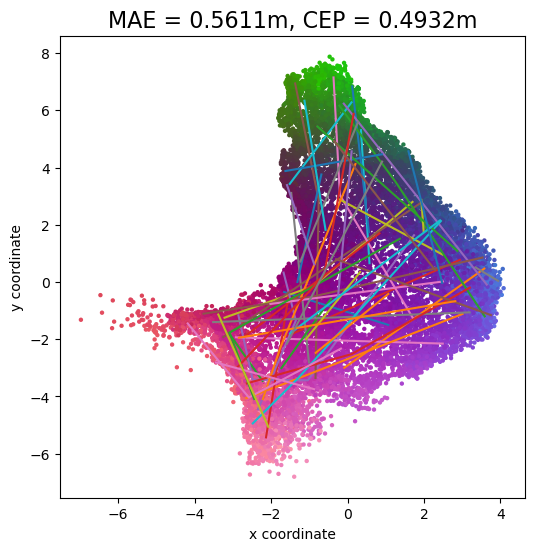

 999/3000 [========>.....................] - ETA: 1:42 - loss: 1.3985 - metric: 0.0000e+00

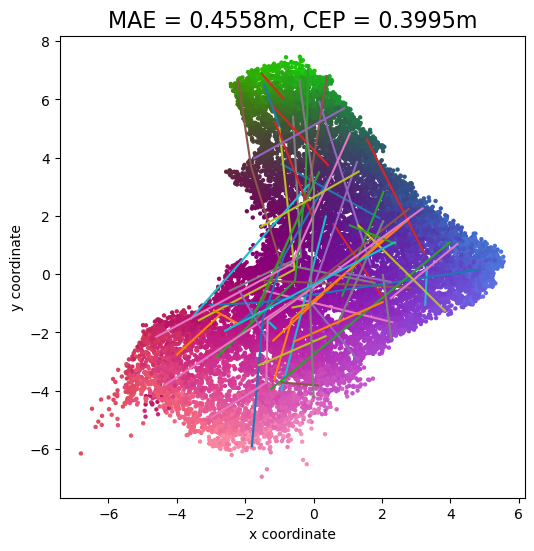

1199/3000 [==========>...................] - ETA: 1:32 - loss: 1.2000 - metric: 0.0000e+00

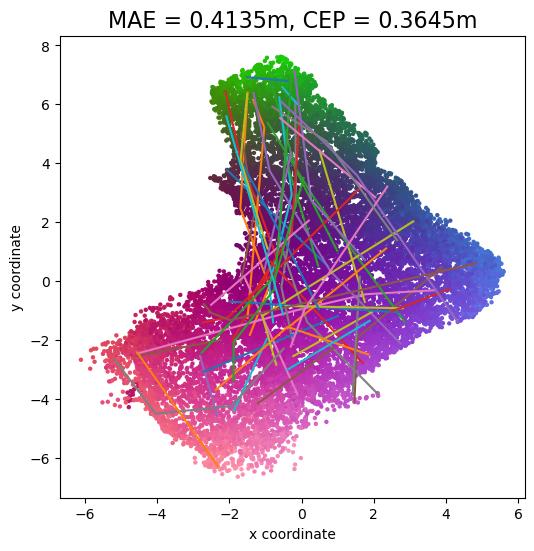

1399/3000 [============>.................] - ETA: 1:22 - loss: 1.0525 - metric: 0.0000e+00

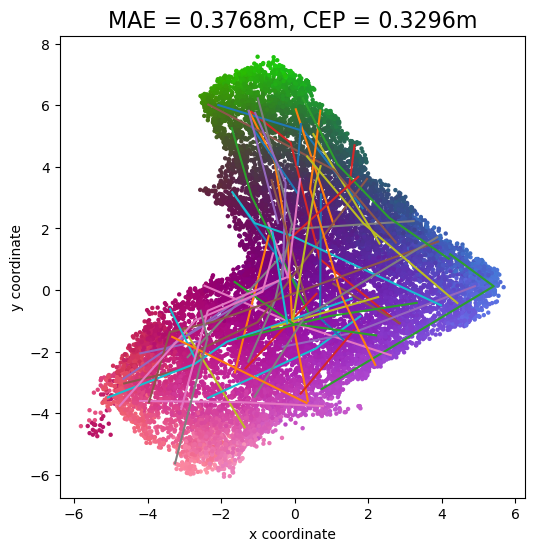

1599/3000 [==============>...............] - ETA: 1:11 - loss: 0.9489 - metric: 0.0000e+00

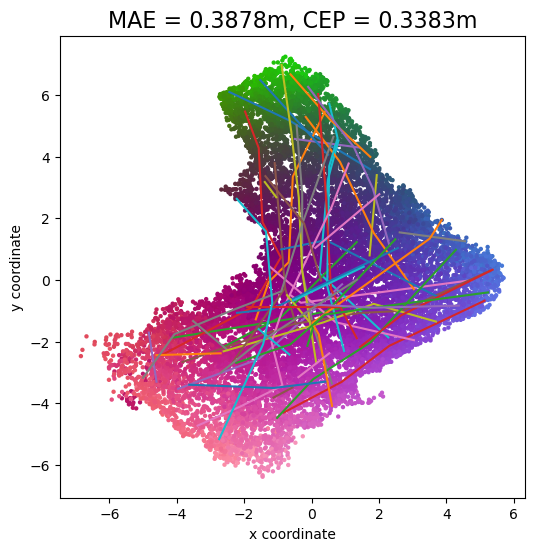

1799/3000 [================>.............] - ETA: 1:01 - loss: 0.8648 - metric: 0.0000e+00

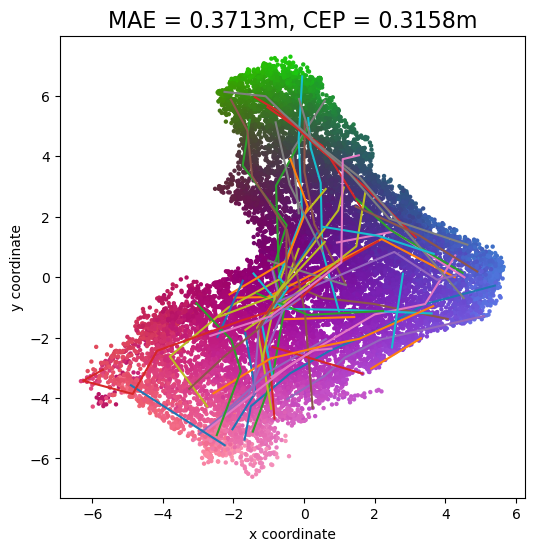

1999/3000 [==================>...........] - ETA: 51s - loss: 0.7989 - metric: 0.0000e+00

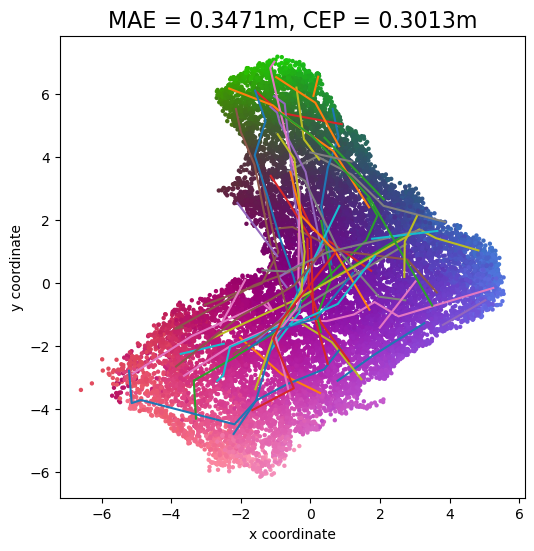

2199/3000 [====================>.........] - ETA: 41s - loss: 0.7403 - metric: 0.0000e+00

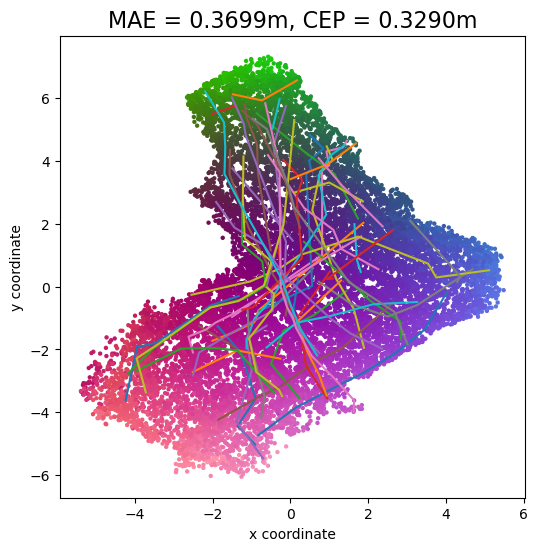

2399/3000 [======================>.......] - ETA: 30s - loss: 0.6901 - metric: 0.0000e+00

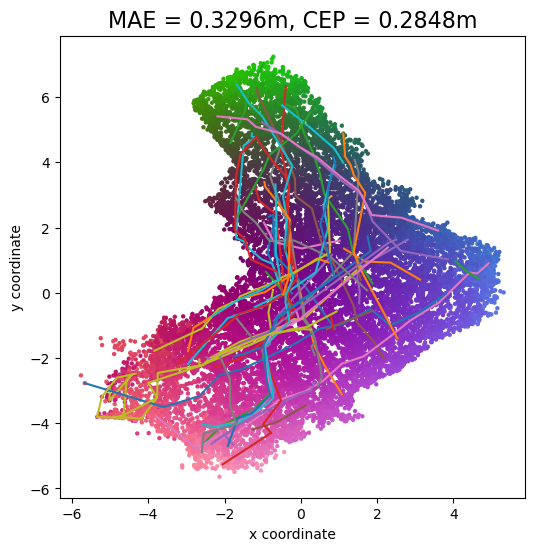

2599/3000 [========================>.....] - ETA: 20s - loss: 0.6431 - metric: 0.0000e+00

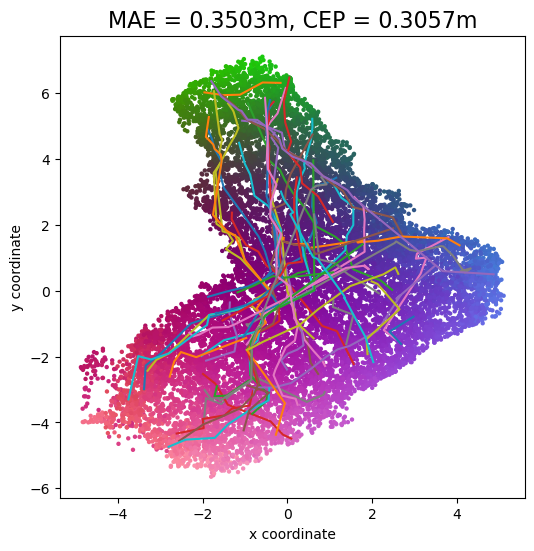

2799/3000 [==========================>...] - ETA: 10s - loss: 0.5961 - metric: 0.0000e+00

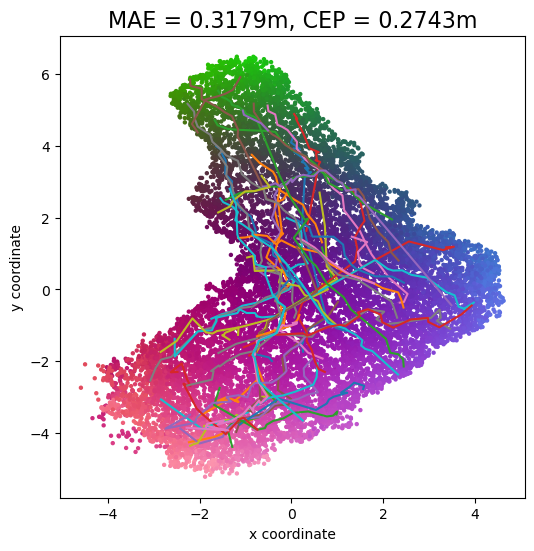

2999/3000 [============================>.] - ETA: 0s - loss: 0.5493 - metric: 0.0000e+00

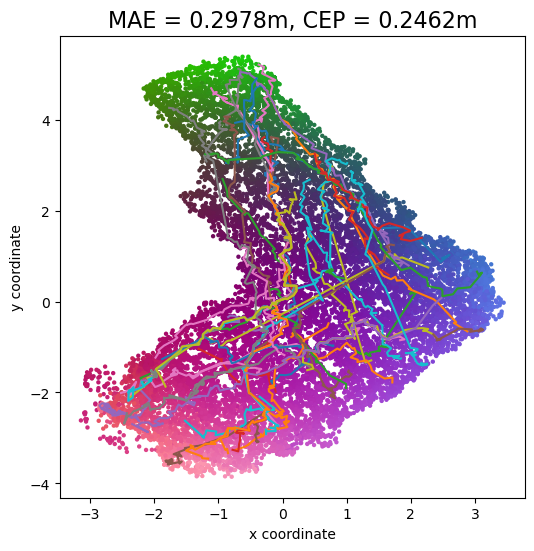

3000/3000 [==============================] - 160s 52ms/step - loss: 0.5491 - metric: 0.0000e+00


In [10]:
plot_callback = Evaluation.PlotChartCallback(groundtruth_positions, csi_time_domain.shape[0])
cc = ChannelChartingCore.ChannelChart(GDM, csi_time_domain, timestamps, min_batch_size = MIN_BATCH_SIZE, max_batch_size = MAX_BATCH_SIZE, learning_rate_initial = LEARNING_RATE_INITIAL, learning_rate_final = LEARNING_RATE_FINAL, max_hoplength = MAX_HOPLENGTH, min_hoplength = MIN_HOPLENGTH, randomize_pathhops = False, training_batches = TRAINING_BATCHES, plot_callback = plot_callback, acceleration_mean = ACCELERATION_MEAN, acceleration_variance = ACCELERATION_VARIANCE, acceleration_weight = ACCELERATION_WEIGHT)

### Evaluation on Training Set

This is a valid evaluation metric for a self-supervised training technique like Channel Charting.

In [11]:
channel_chart_positions = cc.predict(csi_time_domain)

652/652 [==============================] - 2s 2ms/step


In [12]:
ct, tw, ks = Evaluation.ct_tw_ks_on_subset(groundtruth_positions, channel_chart_positions)
print(f"CT: {ct:.4f}\nTW: {tw:.4f}\nKS: {ks:.4f}")

CT: 0.9977
TW: 0.9978
KS: 0.0718


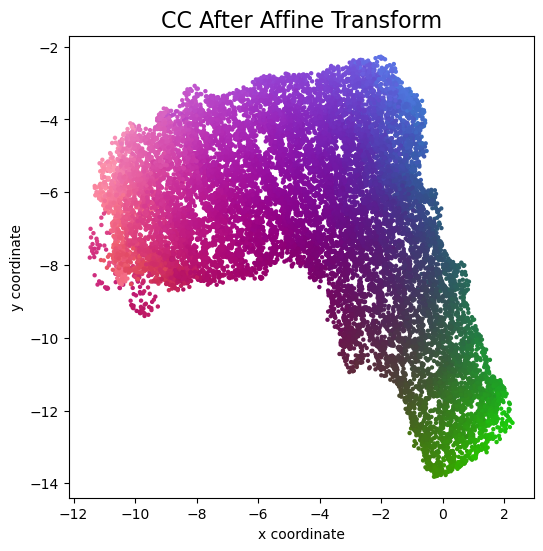

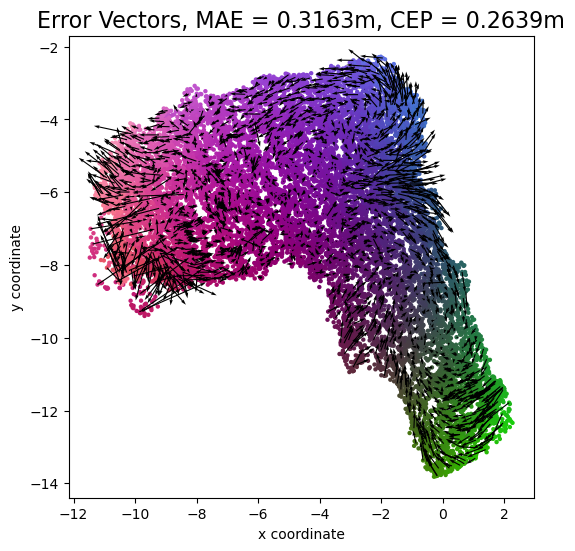

In [13]:
channel_chart_positions_transformed, errorvectors, errors, mae, cep = Evaluation.mean_absolute_error_transformed(groundtruth_positions, channel_chart_positions)
Evaluation.plot_colorized(channel_chart_positions_transformed, groundtruth_positions, title = "CC After Affine Transform")

nth_errorvector = 10
Evaluation.plot_colorized(channel_chart_positions_transformed, groundtruth_positions, title = f"Error Vectors, MAE = {mae:.4f}m, CEP = {cep:.4f}m", show = False)
plt.quiver(channel_chart_positions_transformed[::nth_errorvector, 0], channel_chart_positions_transformed[::nth_errorvector, 1], errorvectors[::nth_errorvector, 0], errorvectors[::nth_errorvector, 1], color = "black", angles = "xy", scale_units = "xy", scale = 1)
plt.show()

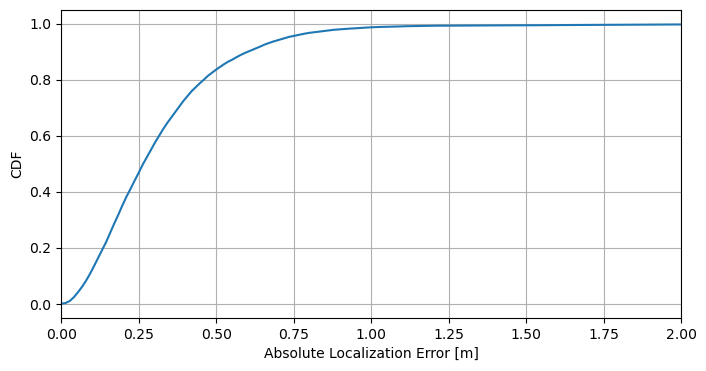

In [14]:
count, bins_count = np.histogram(errors, bins=200)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

bins_count[0] = 0
cdf = np.append([0], cdf)

plt.figure(figsize=(8, 4))
plt.plot(bins_count, cdf)
plt.xlim((0, 2))
plt.xlabel("Absolute Localization Error [m]")
plt.ylabel("CDF")
plt.grid()
plt.show()

### Evaluate on Test Set
The performance on the test set is very similar to the performance we observe for the training set, as one would hope.

In [15]:
test_set_groundtruth_positions = []
test_set_csi_time_domain = []

for csi, pos, time in dichasus_cf0x.testset.batch(1000):
    test_set_csi_time_domain.append(csi.numpy())
    test_set_groundtruth_positions.append(pos.numpy())

test_set_csi_time_domain = np.concatenate(test_set_csi_time_domain)
test_set_groundtruth_positions = np.concatenate(test_set_groundtruth_positions)

In [16]:
test_set_channel_chart_positions = cc.predict(test_set_csi_time_domain)

652/652 [==============================] - 1s 2ms/step


In [17]:
ts_ct, ts_tw, ts_ks = Evaluation.ct_tw_ks_on_subset(test_set_groundtruth_positions, test_set_channel_chart_positions)
print(f"CT: {ts_ct:.4f}\nTW: {ts_tw:.4f}\nKS: {ts_ks:.4f}")

CT: 0.9979
TW: 0.9980
KS: 0.0719


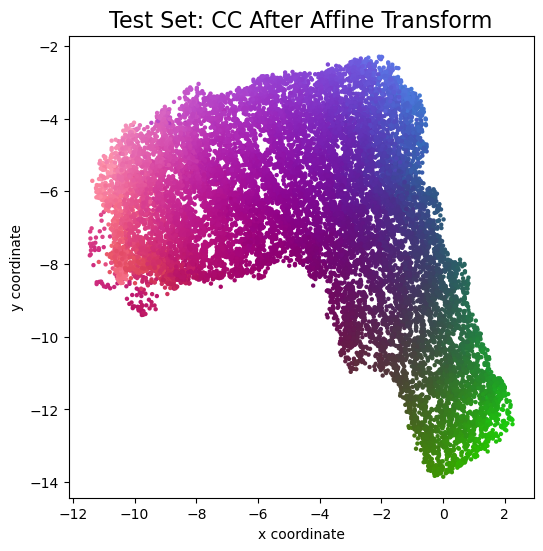

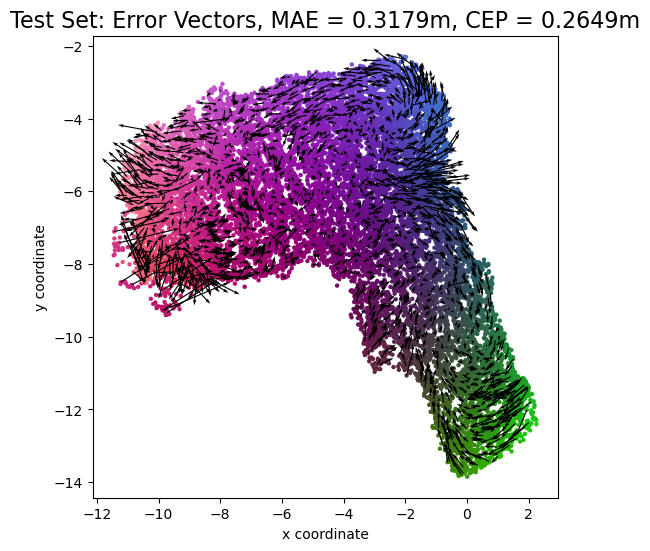

In [18]:
test_set_channel_chart_positions_transformed, ts_errorvectors, ts_errors, ts_mae, ts_cep = Evaluation.mean_absolute_error_transformed(test_set_groundtruth_positions, test_set_channel_chart_positions)
Evaluation.plot_colorized(test_set_channel_chart_positions_transformed, test_set_groundtruth_positions, title = "Test Set: CC After Affine Transform")

nth_errorvector = 10
Evaluation.plot_colorized(test_set_channel_chart_positions_transformed, test_set_groundtruth_positions, title = f"Test Set: Error Vectors, MAE = {ts_mae:.4f}m, CEP = {ts_cep:.4f}m", show = False)
plt.quiver(test_set_channel_chart_positions_transformed[::nth_errorvector, 0], test_set_channel_chart_positions_transformed[::nth_errorvector, 1], ts_errorvectors[::nth_errorvector, 0], ts_errorvectors[::nth_errorvector, 1], color = "black", angles = "xy", scale_units = "xy", scale = 1)
plt.show()